In [5]:
import a_funciones as funciones  ###archivo de funciones propias
import pandas as pd ### para manejo de datos
import joblib
import openpyxl ## para exportar a excel
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_models = pd.read_csv('data//df_employees_models.csv')

In [3]:
if __name__=="__main__":
    df_despliegue = pd.read_csv('data//test.csv')
    
    df_despliegue['Age'] = df_despliegue['Age'] + 1
    
     ####Otras transformaciones en python (imputación, dummies y seleccion de variables)
    df_t = funciones.preparar_datos(df_despliegue)
    
     ##Cargar modelo y predecir
    rf_despliegue = joblib.load("salidas\\rf_final.pkl")
    predicciones=rf_despliegue.predict(df_t)
    pd_pred=pd.DataFrame(predicciones, columns=['pred_ret_2017'])
    
    ###Crear base con predicciones ####
    perf_pred=pd.concat([df_despliegue['EmployeeID'],df_t, pd_pred],axis=1)
    
    df_pred = perf_pred.loc[:,['EmployeeID', 'pred_ret_2017']]
    
    ####ver_predicciones ###
    emp_pred=df_pred['pred_ret_2017']
    emp_pred = pd.DataFrame(emp_pred, columns=['pred_ret_2017'])
    emp_pred.set_index(df_despliegue['EmployeeID'], inplace=True)
    emp_pred = emp_pred.reset_index() 
    
    emp_pred.to_excel("salidas\\prediccion.xlsx")   #### exportar predicciones mas bajas y variables explicativas
    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   BusinessTravel  4410 non-null   object
 1   Department      4410 non-null   object
 2   EducationField  4410 non-null   object
 3   MaritalStatus   4410 non-null   object
dtypes: object(4)
memory usage: 137.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   EmployeeID               4410 non-null   float64
 1   Age                      4410 non-null   float64
 2   DistanceFromHome         4410 non-null   float64
 3   Education                4410 non-null   float64
 4   JobLevel                 4410 non-null   float64
 5   MonthlyIncome            4410 non-null   float64
 6   NumCompaniesWorked       4410 non-null   flo

In [4]:
emp_pred

,EmployeeID,pred_ret_2017
0,8246,1
1,8255,1
2,8260,1
3,8264,1
4,8279,1
...,...,...
4405,8384,1
4406,8390,1
4407,8391,1
4408,8405,1


In [20]:
emp_pred['pred_ret_2017'].value_counts()

pred_ret_2017
0    3724
1     686
Name: count, dtype: int64

C:\Users\srest\AppData\Local\Temp\ipykernel_20084\993033521.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=emp_pred, x='pred_ret_2017', palette=['#979dac', '#ffb703'])


([<matplotlib.axis.XTick at 0x222899a2c50>,
 [Text(0, 0, '0'), Text(1, 0, '1')])

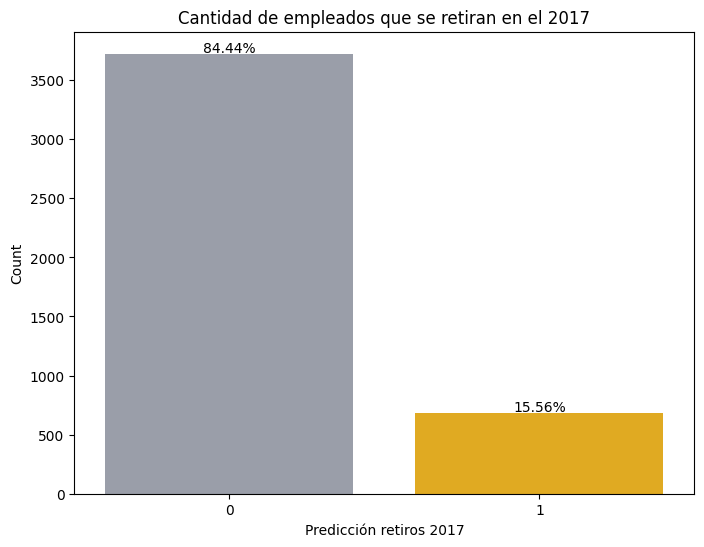

In [14]:
# Contar las frecuencias de cada valor en la columna 'pred_ret_2017'
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=emp_pred, x='pred_ret_2017', palette=['#979dac', '#ffb703'])

# Crear el gráfico de barras

#counts.plot(kind='bar', color=['skyblue', 'salmon'])
plt.xlabel('Predicción retiros 2017')
plt.ylabel('Count')
plt.title('Cantidad de empleados que se retiran en el 2017')

# Calcula las frecuencias y porcentajes
counts = emp_pred['pred_ret_2017'].value_counts()
total = len(emp_pred)
percentages = (counts / total * 100).reindex([0, 1], fill_value=0)


# Configura los ticks y etiquetas
ax.set_xticks([0, 1])
ax.set_xticklabels(['Permanece', 'Se Retira'])

for tick in [0, 1]:
    count = counts.get(tick, 0)
    percentage = percentages.get(tick, 0)
    ax.text(tick, count + 10, f'{percentage:.2f}%', ha='center', color='black')
plt.xticks(ticks=[0, 1], labels=['0', '1'], rotation=0)
